In [ ]:
!pip install arxiv langdetect

In [ ]:
pip install pymongo

In [ ]:
pip install nltk 

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayuag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayuag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayuag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import arxiv
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from pymongo import MongoClient, errors

In [ ]:
# Daftar subkategori yang diinginkan
subcategories = [
     'cs.AI', 'cs.CR', 'cs.CV','cs.DB', 'cs.DS', 'cs.GT', 'cs.IR', 'cs.LG', 'cs.NE', 'cs.SE',
    'eess.AS', 'eess.IV', 'cs.CV','eess.SY',
]

# Jumlah makalah yang diinginkan per subkategori (misal ~1200 untuk total ~15.600 makalah)
papers_per_category = 1200

# Tahun saat ini dan 5 tahun terakhir
current_year = datetime.now().year
start_year = current_year - 5

In [ ]:
def daterange(start_date, end_date):
    # Generator tanggal per bulan
    current = start_date
    while current < end_date:
        yield current
        # Tambah 1 bulan
        if current.month == 12:
            current = current.replace(year=current.year + 1, month=1)
        else:
            current = current.replace(month=current.month + 1)

In [ ]:
def fetch_papers_by_month(category, start_year, end_year, max_per_month=100):
    papers = []
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year + 1, 1, 1)  # sampai awal tahun berikutnya

    for single_month in daterange(start_date, end_date):
        # Hitung tanggal awal dan akhir bulan
        month_start = single_month
        if single_month.month == 12:
            month_end = single_month.replace(year=single_month.year + 1, month=1)
        else:
            month_end = single_month.replace(month=single_month.month + 1)

        query = f"cat:{category} AND submittedDate:[{month_start.strftime('%Y%m%d0000')} TO {month_end.strftime('%Y%m%d0000')}]"

        search = arxiv.Search(
            query=query,
            max_results=max_per_month,
            sort_by=arxiv.SortCriterion.SubmittedDate,
            sort_order=arxiv.SortOrder.Descending
        )

        count = 0
        for result in search.results():
            papers.append({
                'id': result.entry_id,
                'title': result.title,
                'authors': ', '.join([author.name for author in result.authors]),
                'summary': result.summary,
                'published': result.published.strftime('%Y-%m-%d'),
                'updated': result.updated.strftime('%Y-%m-%d'),
                'primary_category': result.primary_category,
                'categories': ', '.join(result.categories),
                'pdf_url': result.pdf_url
            })
            count += 1
            time.sleep(0.1)

        print(f"{category} | Bulan {month_start.strftime('%Y-%m')} : {count} makalah")

        if len(papers) >= papers_per_category:
            print(f"Sudah cukup {papers_per_category} makalah untuk kategori {category}")
            break

        time.sleep(2)  # Sleep antar bulan supaya aman

    return papers[:papers_per_category]

In [ ]:
all_papers = []

for category in subcategories:
    print(f"Memulai pengambilan data kategori: {category}")
    papers = fetch_papers_by_month(category, start_year, current_year, max_per_month=100)
    all_papers.extend(papers)
    print(f"Total makalah diambil untuk {category}: {len(papers)}\n")

df = pd.DataFrame(all_papers)
df.to_csv('arxiv_cs_subcategories.csv', index=False)
print("Data tersimpan di 'arxiv_cs_subcategories.csv'")

Memulai pengambilan data kategori: cs.AI


<ipython-input-9-8978dd7105ee>:24: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


cs.AI | Bulan 2020-01 : 100 makalah
cs.AI | Bulan 2020-02 : 100 makalah
cs.AI | Bulan 2020-03 : 100 makalah
cs.AI | Bulan 2020-04 : 100 makalah
cs.AI | Bulan 2020-05 : 100 makalah
cs.AI | Bulan 2020-06 : 100 makalah
cs.AI | Bulan 2020-07 : 100 makalah
cs.AI | Bulan 2020-08 : 100 makalah
cs.AI | Bulan 2020-09 : 100 makalah
cs.AI | Bulan 2020-10 : 100 makalah
cs.AI | Bulan 2020-11 : 100 makalah
cs.AI | Bulan 2020-12 : 100 makalah
Sudah cukup 1200 makalah untuk kategori cs.AI
Total makalah diambil untuk cs.AI: 1200

Memulai pengambilan data kategori: cs.CR
cs.CR | Bulan 2020-01 : 100 makalah
cs.CR | Bulan 2020-02 : 100 makalah
cs.CR | Bulan 2020-03 : 100 makalah
cs.CR | Bulan 2020-04 : 100 makalah
cs.CR | Bulan 2020-05 : 100 makalah
cs.CR | Bulan 2020-06 : 100 makalah
cs.CR | Bulan 2020-07 : 100 makalah
cs.CR | Bulan 2020-08 : 100 makalah
cs.CR | Bulan 2020-09 : 100 makalah
cs.CR | Bulan 2020-10 : 100 makalah
cs.CR | Bulan 2020-11 : 100 makalah
cs.CR | Bulan 2020-12 : 100 makalah
Sudah cu

In [ ]:
import pandas as pd

file1 = pd.read_csv('/content/arxiv_cs_subcategories (1).csv')
file2 = pd.read_csv('/content/arxiv_cs_subcategories (2).csv')

result = pd.concat([file1, file2])

# Simpan hasil ke file baru
result.to_csv('arxiv_cs_eess.csv', index=False)

In [ ]:
df = pd.read_csv('/content/arxiv_cs_eess.csv')

df.head()

,id,title,authors,summary,published,updated,primary_category,categories,pdf_url
0,http://arxiv.org/abs/2505.04623v1,EchoInk-R1: Exploring Audio-Visual Reasoning i...,"Zhenghao Xing, Xiaowei Hu, Chi-Wing Fu, Wenhai...",Multimodal large language models (MLLMs) have ...,2025-05-07,2025-05-07,eess.AS,"eess.AS, cs.AI, cs.CV, cs.MM, cs.SD",http://arxiv.org/pdf/2505.04623v1
1,http://arxiv.org/abs/2505.04621v1,Score Distillation Sampling for Audio: Source ...,"Jessie Richter-Powell, Antonio Torralba, Jonat...","We introduce Audio-SDS, a generalization of Sc...",2025-05-07,2025-05-07,cs.SD,"cs.SD, cs.AI, cs.LG, cs.MM, eess.AS, 68T07, I....",http://arxiv.org/pdf/2505.04621v1
2,http://arxiv.org/abs/2505.04608v1,WATCH: Weighted Adaptive Testing for Changepoi...,"Drew Prinster, Xing Han, Anqi Liu, Suchi Saria",Responsibly deploying artificial intelligence ...,2025-05-07,2025-05-07,cs.LG,"cs.LG, cs.AI, stat.ML",http://arxiv.org/pdf/2505.04608v1
3,http://arxiv.org/abs/2505.04592v1,AI Governance to Avoid Extinction: The Strateg...,"Peter Barnett, Aaron Scher",Humanity appears to be on course to soon devel...,2025-05-07,2025-05-07,cs.CY,"cs.CY, cs.AI",http://arxiv.org/pdf/2505.04592v1
4,http://arxiv.org/abs/2505.04578v1,Fight Fire with Fire: Defending Against Malici...,Wenjun Cao,Reinforcement learning (RL) fine-tuning transf...,2025-05-07,2025-05-07,cs.LG,"cs.LG, cs.AI",http://arxiv.org/pdf/2505.04578v1


## Validasi Dataset

In [ ]:
# Load dataset
df = pd.read_csv("arxiv_cs_subcategories (4).csv")

# Fungsi deteksi bahasa
def is_english(text):
    try:
        return detect(str(text)) == 'en'
    except LangDetectException:
        return False

# Tambahkan kolom deteksi bahasa
df['is_english'] = df['summary'].apply(is_english)

# Filter artikel berbahasa Inggris
df_english = df[df['is_english']]

# Filter artikel yang dieliminasi (tidak berbahasa Inggris)
df_non_english = df[~df['is_english']]

# Simpan keduanya
df_english.to_csv("validated_dataset.csv", index=False)
df_non_english.to_csv("eliminated dataset.csv", index=False)

# Statistik
print(f"Total artikel      : {len(df)}")
print(f"Berbahasa Inggris : {len(df_english)}")
print(f"Dieliminasi        : {len(df_non_english)}")


In [5]:
df = pd.read_csv("validated_dataset.csv")
print(df.shape)

(16799, 10)


In [6]:
df.columns

Index(['id', 'title', 'authors', 'summary', 'published', 'updated',
       'primary_category', 'categories', 'pdf_url', 'is_english'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                16799 non-null  object
 1   title             16799 non-null  object
 2   authors           16799 non-null  object
 3   summary           16799 non-null  object
 4   published         16799 non-null  object
 5   updated           16799 non-null  object
 6   primary_category  16799 non-null  object
 7   categories        16799 non-null  object
 8   pdf_url           16799 non-null  object
 9   is_english        16799 non-null  bool  
dtypes: bool(1), object(9)
memory usage: 1.2+ MB


In [8]:
print(df.isnull().sum())

id                  0
title               0
authors             0
summary             0
published           0
updated             0
primary_category    0
categories          0
pdf_url             0
is_english          0
dtype: int64


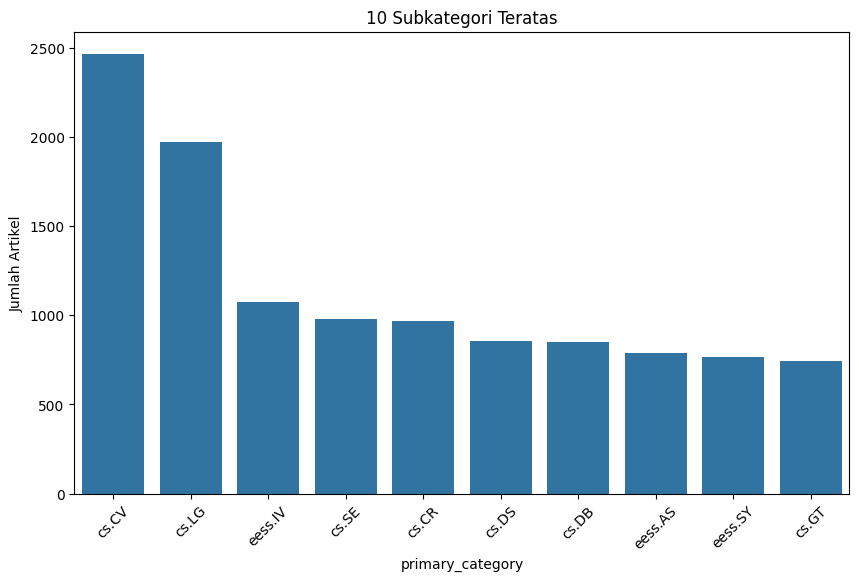

In [ ]:
plt.figure(figsize=(10,6))
top_cats = df['primary_category'].value_counts().nlargest(10)
sns.barplot(x=top_cats.index, y=top_cats.values)
plt.title("10 Subkategori Teratas")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Artikel")
plt.show()

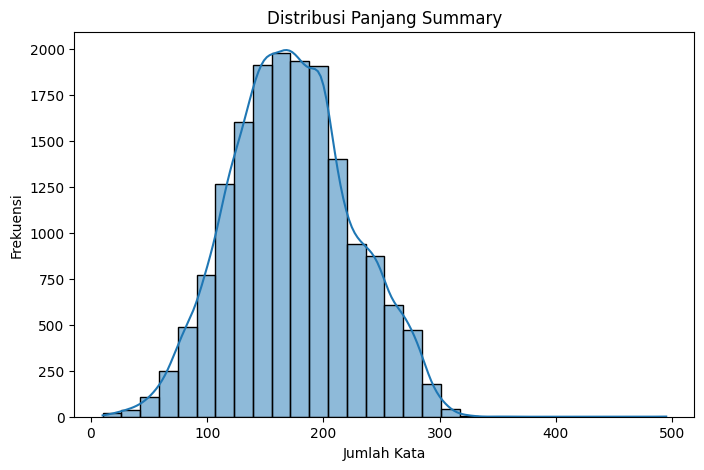

In [ ]:
df['summary_length'] = df['summary'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df['summary_length'], bins=30, kde=True)
plt.title("Distribusi Panjang Summary")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()

In [9]:
df.shape

(16799, 10)

## Koneksi ke MongoDB

In [3]:
def connect_to_mongodb(uri="mongodb://localhost:27017", db_name="arxiv_db", collection_name="papers"):
    client = MongoClient(uri)
    db = client[db_name]
    return db[collection_name]

def load_csv_to_dict(csv_path):
    df = pd.read_csv(csv_path)
    return df.to_dict(orient="records")

def insert_data(collection, data):
    if data:
        collection.insert_many(data)
        print(f"{len(data)} dokumen berhasil dimasukkan ke MongoDB.")
    else:
        print("Data kosong.")

In [4]:
csv_path = "validated_dataset.csv"
collection = connect_to_mongodb()
data = load_csv_to_dict(csv_path)
insert_data(collection, data)

16799 dokumen berhasil dimasukkan ke MongoDB.
